## Random Forest Assignment
In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set. Following the code to get data into the environment:

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn import datasets

boston = datasets.load_boston()

features = pd.DataFrame(boston.data, columns=boston.feature_names)

targets = boston.target

In [1]:
# Load the packages and the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
boston = datasets.load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['PRICE'] = boston.target

In [2]:
# description of boston dataset
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Checking for Null values
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### Declare the dependent and independent variables

In [5]:
y = bos['PRICE'] # dependent variable
X = bos.drop(columns = 'PRICE') # independent variables

### Data Visualization

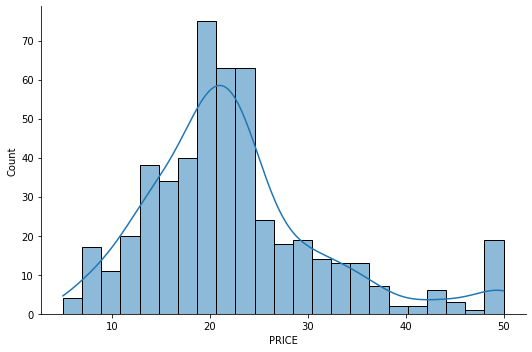

In [6]:
# Checking the distribution of PRICE
sns.displot(y, kde=True, aspect=1.5)

PRICE is normally distributed

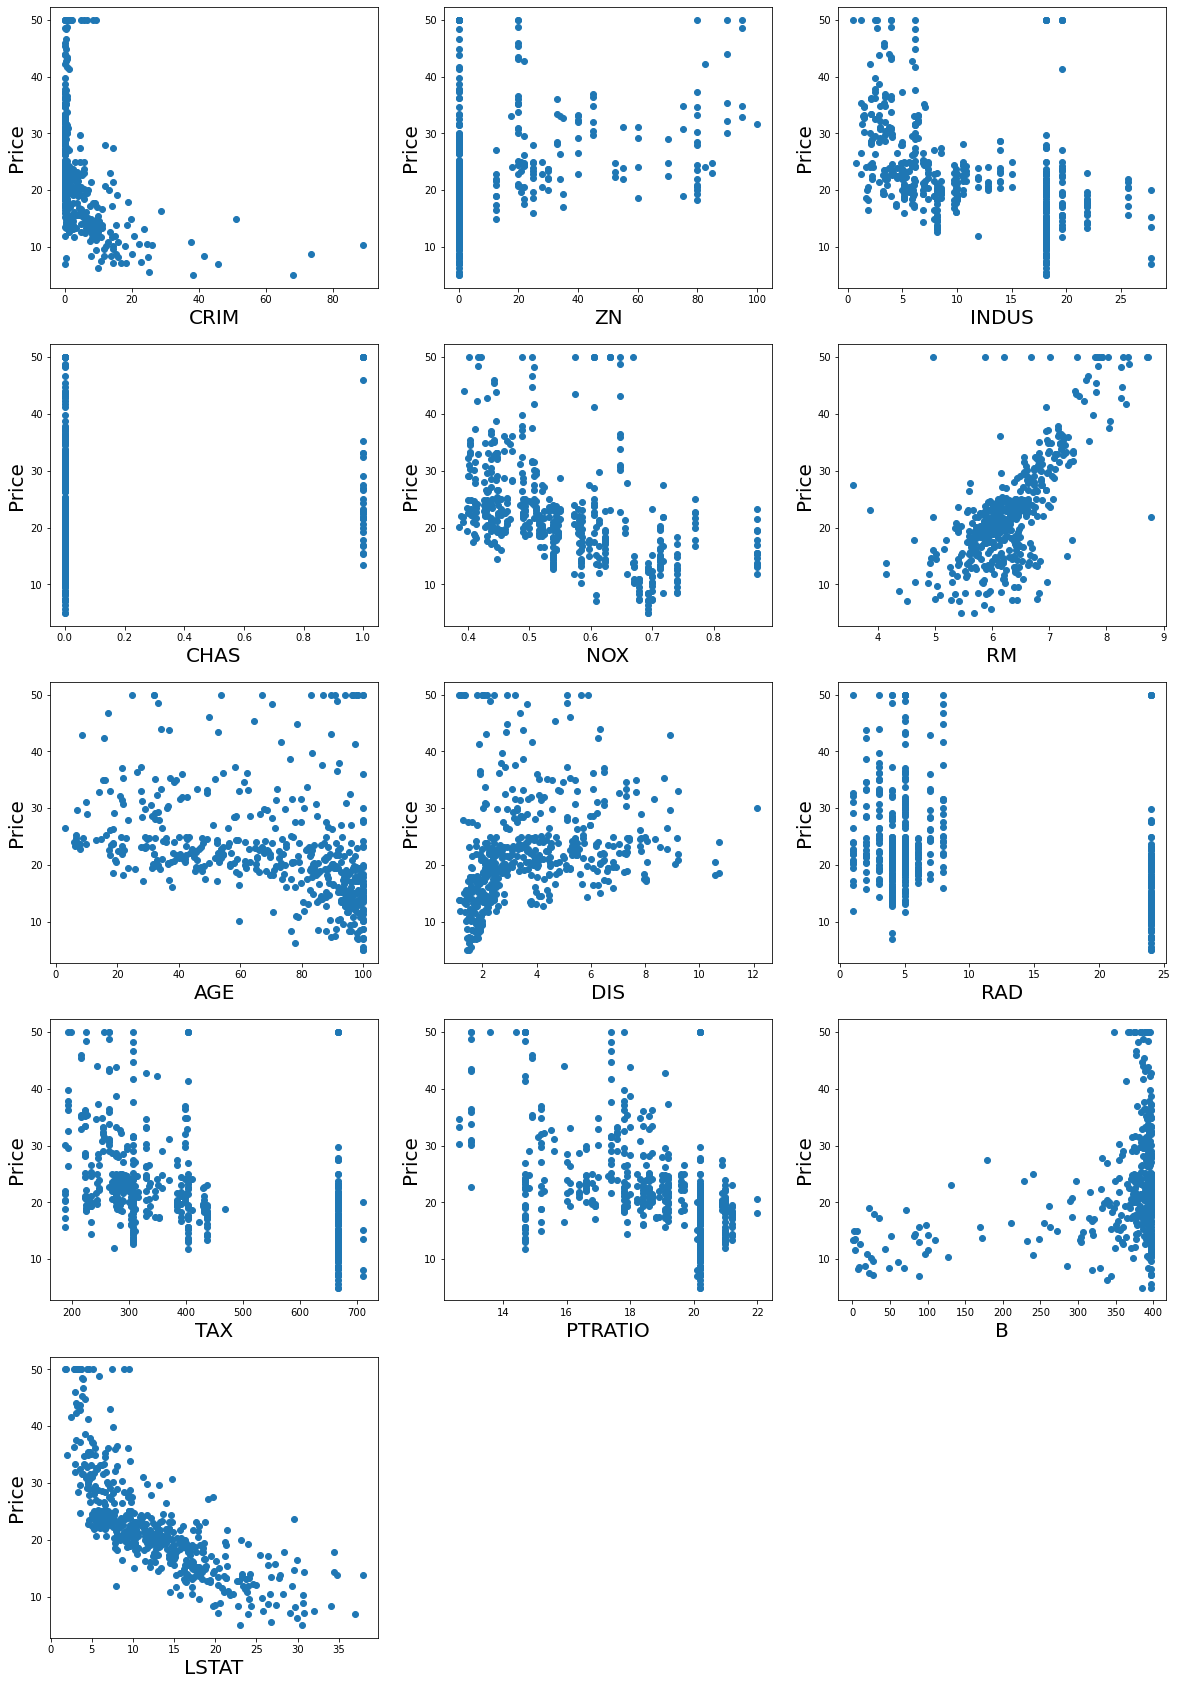

In [7]:
# visualise how the dependent variable varies with respect to each of the independent features
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    ax = plt.subplot(5, 3, plotnumber)
    plt.scatter(X[column], y)
    plt.xlabel(column, fontsize=20)
    plt.ylabel('Price', fontsize=20)
    plotnumber+=1


Let's move ahead and check for multicollinearity.


### Multicollinearity

In [8]:
#### standarisation
scaler=StandardScaler()
### fit_transform
X_scaled=scaler.fit_transform(X)

# we use variance_inflation_factor from statsmodels library
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# Include names of features so it is easier to explore the result
vif["Features"] = X.columns

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif

,Features,VIF
0,CRIM,1.792192
1,ZN,2.298758
2,INDUS,3.991596
3,CHAS,1.073995
4,NOX,4.393720
5,RM,1.933744
6,AGE,3.100826
7,DIS,3.955945
8,RAD,7.484496
9,TAX,9.008554


Here, we have the correlation values for all the features. The VIFs are all less than 10, indicating that multicollinearity is not a serious concern.


### Train Test Split

In [9]:
# Split the variables with an 70-30 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=365)

### Random Forset Regression

In [10]:
# Create a Random Forest Regressor
rand_reg = RandomForestRegressor(random_state=2)

# Train the model using the training sets 
rand_reg.fit(x_train, y_train)

print('R-squared = ', rand_reg.score(x_train, y_train))

# Let's create a function to create adjusted R-Squared
def adj_r2(model, x, y):
    r2 = model.score(x, y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

print('Adjusted R-squared = ', adj_r2(rand_reg, x_train, y_train))

R-squared =  0.9740346960711297
Adjusted R-squared =  0.9730419050385553


In [11]:
# Model prediction on train data
y_pred = rand_reg.predict(x_train)

In [12]:
# Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_train, y_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAE: 0.8713192090395481
MSE: 2.128674861581923
RMSE: 1.4589978963596633


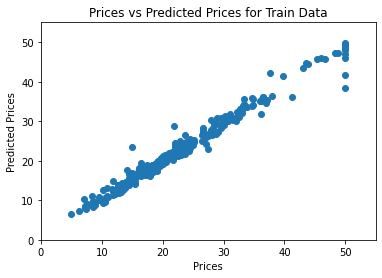

In [13]:
# The simplest way to compare the targets (y_train) and the predictions (y_pred) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the predictions
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices for Train Data")
# We want the x-axis and the y-axis to be the same to interpret the '45-degree line'
plt.xlim(0, 55)
plt.ylim(0, 55)
plt.show()

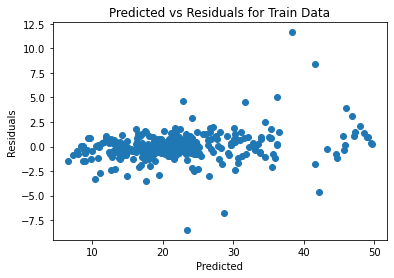

In [14]:
# Checking residuals
plt.scatter(y_pred, y_train-y_pred)
plt.title("Predicted vs Residuals for Train Data")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

There is no pattern visible in this plot

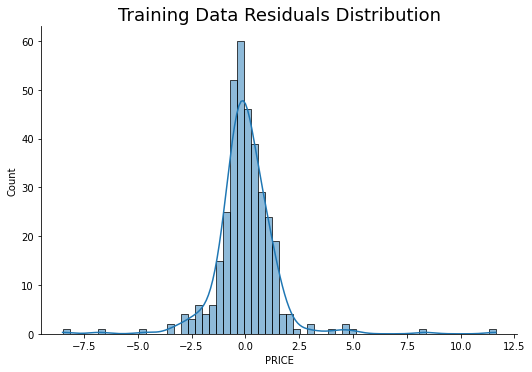

In [15]:
# We can plot the Distribution of the residuals and check for anomalies

sns.displot(y_train - y_pred, kde=True, aspect=1.5)

# Include a title
plt.title("Training Data Residuals Distribution", size=18)
plt.show()

# In the best case scenario this plot should be normally distributed

### Testing

In [16]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# If the predictions are far off, we will know that our model overfitted

print('Test Data R-squared = ', rand_reg.score(x_test, y_test))
print('Test Data Adjusted R-squared = ', adj_r2(rand_reg, x_test, y_test))

# Predicting Test data with the model
y_test_pred = rand_reg.predict(x_test)

print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Test Data R-squared =  0.8293274715645118
Test Data Adjusted R-squared =  0.8132496246829078
MAE: 2.3221973684210537
MSE: 15.365491644736844
RMSE: 3.919884136647006


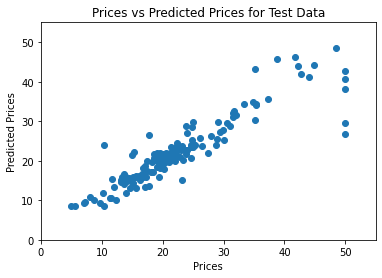

In [17]:
# Create a scatter plot with the test targets (y_test) and the test predictions (y_test_pred)
# The closer the points to the 45-degree line, the better the predictions
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices for Test Data")
plt.xlim(0, 55)
plt.ylim(0, 55)
plt.show()

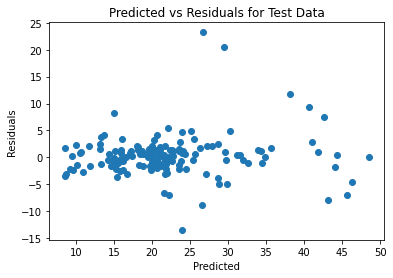

In [18]:
# Checking residuals
plt.scatter(y_test_pred, y_test - y_test_pred)
plt.title("Predicted vs Residuals for Test Data")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

There is no pattern visible in this plot

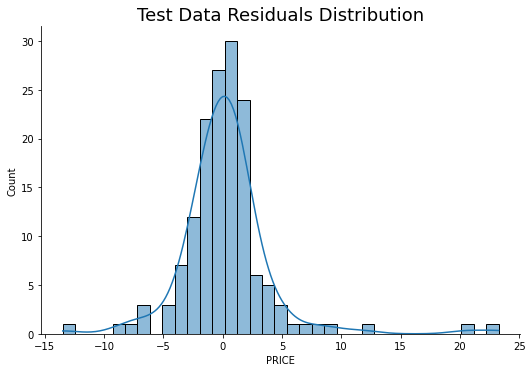

In [19]:
# We can plot the Distribution of the residuals and check for anomalies

sns.displot(y_test - y_test_pred, kde=True, aspect=1.5)

# Include a title
plt.title("Test Data Residuals Distribution", size=18)
plt.show()

# In the best case scenario this plot should be normally distributed

In [20]:
# Hyperparameters tuning
grid_param = {
    "n_estimators" : [90, 100, 115, 130],
    'criterion': ['mse', 'mae'],
    'min_samples_leaf' : range(1, 10, 1),
    'min_samples_split': range(2, 10, 1),
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [21]:
grid_search = GridSearchCV(estimator=rand_reg, param_grid=grid_param, cv=5, n_jobs=-1, verbose=3)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=2), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [90, 100, 115, 130]},
             verbose=3)

In [22]:
#let's see the best parameters as per our grid search
grid_search.best_params_

{'criterion': 'mae',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 130}

In [23]:
# Model with hyperparameters
rand_reg = RandomForestRegressor(criterion='mae', max_features='sqrt', min_samples_leaf=1, min_samples_split=2,
                                 n_estimators=130, random_state=2)

In [24]:
# Fit the model
rand_reg.fit(x_train,y_train)

# Test data Score
print('Test Data R-squared = ', rand_reg.score(x_test, y_test))
print('Test Data Adjusted R-squared = ', adj_r2(rand_reg, x_test, y_test))

# Predicting Test data with the model
y_test_pred = rand_reg.predict(x_test)

print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Test Data R-squared =  0.8448452851072108
Test Data Adjusted R-squared =  0.8302292612404988
MAE: 2.239402834008098
MSE: 13.968437083463078
RMSE: 3.737437234718876


In [25]:
# Hyperparameters tuning
grid_param = {
    "n_estimators" : [120, 125, 130, 135, 140],
    'criterion': ['mse', 'mae'],
    'min_samples_leaf' : range(1, 5, 1),
    'min_samples_split': range(2, 5, 1),
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [26]:
grid_search = GridSearchCV(estimator=rand_reg, param_grid=grid_param, cv=5, n_jobs=-1, verbose=3)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(criterion='mae',
                                             max_features='sqrt',
                                             n_estimators=130, random_state=2),
             n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 5),
                         'n_estimators': [120, 125, 130, 135, 140]},
             verbose=3)

In [27]:
#let's see the best parameters as per our grid search
grid_search.best_params_

{'criterion': 'mae',
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 135}

In [28]:
# Model with hyperparameters
rand_reg = RandomForestRegressor(criterion='mae', max_features='sqrt', min_samples_leaf=1, min_samples_split=2,
                                 n_estimators=135, random_state=2)

In [29]:
# Fit the model
rand_reg.fit(x_train,y_train)

# Test data Score
print('Test Data R-squared = ', rand_reg.score(x_test, y_test))
print('Test Data Adjusted R-squared = ', adj_r2(rand_reg, x_test, y_test))

# Predicting Test data with the model
y_test_pred = rand_reg.predict(x_test)

print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Test Data R-squared =  0.8492980037316342
Test Data Adjusted R-squared =  0.8351014388657737
MAE: 2.2237231968810924
MSE: 13.567562897985686
RMSE: 3.6834172853459988


After hyperparameter tuning model accuracy improved by 2% on the test dataset.